# 📘 Fixed Income and Derivatives II - Stochastic Process Simulations

### 🏆 Objective
This notebook explores **stochastic processes** commonly used in finance and risk modeling.  
We implement and analyze **Gaussian distributions, Wiener Processes, Geometric Brownian Motion (GBM), and Lognormal Processes**.

### 📌 Sections Overview
1️⃣ **Histogram of Gaussian Random Numbers** → Understanding the normal distribution.  
2️⃣ **Wiener Process Simulation (Brownian Motion)** → Simulating standard Brownian motion.  
3️⃣ **Wiener Process over Multiple Time Horizons** → Analyzing statistical properties at different time steps.  
4️⃣ **Geometric Brownian Motion (GBM) Simulation** → Modeling stock prices with drift & volatility.  
5️⃣ **Lognormal Process Simulation** → Distribution of future stock prices over time.

### 🔍 Applications
✅ **Financial modeling** (e.g., stock prices, risk analysis)  
✅ **Monte Carlo simulations** (used in derivative pricing)  
✅ **Understanding random walks & diffusion processes**  

---
📊 **Let's begin!** 🚀


## 1. Histogram of Gaussian Random Numbers

In this section, we generate **10,000 independent Gaussian random numbers** with:

- **Mean (μ) = 0**
- **Standard Deviation (σ) = 1**

The histogram represents the probability density function (PDF) of a standard normal distribution, showing the distribution of these randomly generated values.

### **Key Features of the Plot:**
✅ **Histogram with KDE (Kernel Density Estimation)** for smooth density visualization.  
✅ **Vertical dashed lines** indicating:
   - **Mean (red line)**
   - **Standard deviation bounds (green lines)**
✅ **Professional formatting** using `Seaborn` for better readability.  

Mathematically, each random number \( X \) follows the **standard normal distribution**:

$$
X \sim N(0,1)
$$

where:

- \( \mathbb{E}[X] = 0 \) (expected value),
- \( \text{Var}(X) = 1 \) (variance).  

This visualization helps in understanding the fundamental properties of the **Gaussian (Normal) distribution**, which plays a crucial role in **stochastic processes, risk modeling, and quantitative finance**.


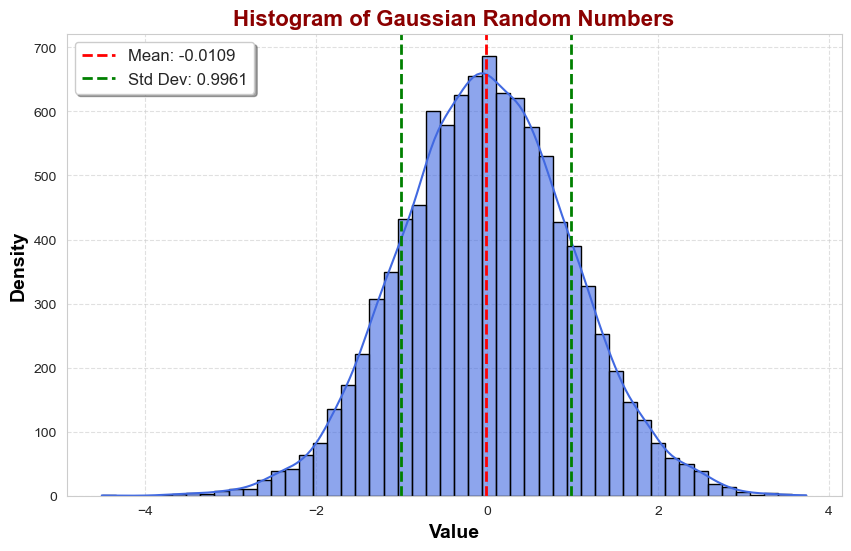

Mean: -0.0109
Variance: 0.9921


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Generate 10,000 Gaussian random numbers (mean=0, std=1)
data = np.random.randn(10000)

# Compute mean and variance
mean_value = np.mean(data)
variance_value = np.var(data)


plt.figure(figsize=(10, 6))
sns.histplot(data, bins=50, kde=True, color='royalblue', edgecolor='black', alpha=0.6)
plt.xlabel('Value', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Density', fontsize=14, fontweight='bold', color='black')
plt.title(f'Histogram of Gaussian Random Numbers', fontsize=16, fontweight='bold', color='darkred')

# Annotate mean and variance
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.4f}')
plt.axvline(mean_value + np.sqrt(variance_value), color='green', linestyle='dashed', linewidth=2, label=f'Std Dev: {np.sqrt(variance_value):.4f}')
plt.axvline(mean_value - np.sqrt(variance_value), color='green', linestyle='dashed', linewidth=2)

# Show legend
plt.legend(fontsize=12, loc='upper left', frameon=True, shadow=True, fancybox=True)

# Display grid
plt.grid(True, linestyle='--', alpha=0.6)

# Show plot
plt.show()

# Print mean and variance
print(f"Mean: {mean_value:.4f}")
print(f"Variance: {variance_value:.4f}")


## 2. Wiener Process (Brownian Motion) Simulation

In this section, we simulate and visualize **multiple paths of a Wiener Process**, also known as **Standard Brownian Motion (SBM)**. This is a fundamental stochastic process used in:

- **Mathematical Finance** (e.g., Black-Scholes model for option pricing),
- **Physics** (e.g., Particle Diffusion),
- **Engineering & Biology** (e.g., Random Walk Models).

### **Mathematical Formulation**
A **Wiener Process** \( W(t) \) satisfies:

$$
W(t) = W(t-1) + \epsilon_t \sqrt{\Delta t}, \quad \epsilon_t \sim N(0,1)
$$

where:
- \( W(0) = 0 \) (starts at zero),
- \( \epsilon_t \) are independent **Gaussian random variables**,
- \( \Delta t = \frac{T}{N} \) is the **time step size**.

### **Key Features of the Simulation**
✅ **Generates multiple independent Wiener process paths.**  
✅ **Uses cumulative sum of Gaussian increments to build paths.**  
✅ **Applies Seaborn styling for a professional look.**  
✅ **Each path is uniquely plotted with different styles.**  

The visualization helps to **understand stochasticity in asset prices, risk modeling, and diffusion processes**.


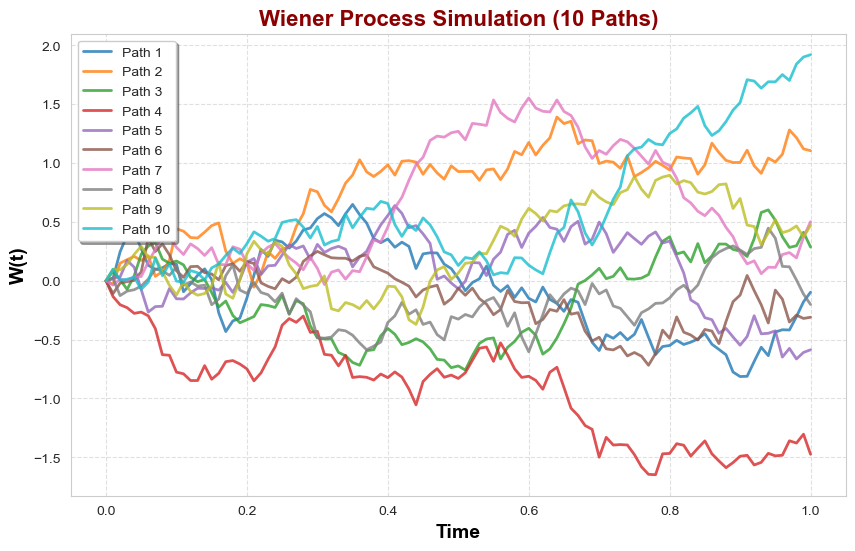

In [ ]:
def wiener_process(N=100, T=1, paths=10):
    """
    Simulates and plots multiple paths of a Wiener Process (Brownian Motion).

    Parameters:
    N : int  - Number of time steps
    T : int  - Time horizon
    paths : int - Number of independent paths to simulate

    Returns:
    None - Displays a professional plot of the Wiener process paths.
    """

    # Define time step and time vector
    dt = T / N  
    t = np.linspace(0, T, N+1)

    # Generate Brownian increments
    dW = np.sqrt(dt) * np.random.randn(paths, N)  
    W = np.cumsum(dW, axis=1)  

    # Add initial zero value for all paths
    W = np.hstack((np.zeros((paths, 1)), W))

    # Professional Plot Settings
    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 6))

    # Plot each path with different styling
    for i in range(paths):
        plt.plot(t, W[i, :], linewidth=2, alpha=0.8, label=f'Path {i+1}')

    # Formatting the plot
    plt.xlabel('Time', fontsize=14, fontweight='bold', color='black')
    plt.ylabel('W(t)', fontsize=14, fontweight='bold', color='black')
    plt.title('Wiener Process Simulation (10 Paths)', fontsize=16, fontweight='bold', color='darkred')

    # Add a legend, grid
    plt.legend(fontsize=10, loc='upper left', frameon=True, shadow=True, fancybox=True)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

wiener_process()


## 3. Wiener Process Simulation Over Multiple Time Horizons

This section extends the previous **Wiener Process (Brownian Motion) simulation** by analyzing **multiple time horizons**.  
Instead of visualizing paths, this simulation **extracts key statistical properties** at specific time intervals.

### **📌 Objective**
We analyze the Wiener process at **\( T = 1, 2, 3 \) years** by computing:
- ✅ **Mean \( E[W(T)] \)** → Should be **0** for a standard Wiener process.
- ✅ **Variance \( Var(W(T)) \)** → Expected to grow **linearly with time** (\( Var(W(T)) = T \)).

### **📊 Simulation Setup**
- **\( N = 100 \)** → Number of time steps per path.
- **\( T = 3 \) years** → Simulation over a 3-year horizon.
- **\( 10,000 \) simulations** → Large sample size for accurate statistics.
- **Extract Wiener process values at \( T = 1, 2, 3 \) years**.

### **🧠 Expected Theoretical Properties**
The Wiener process follows:

$$
W(T) \sim N(0, T)
$$

Thus, for any time \( T \):
- **Mean \( E[W(T)] = 0 \)**
- **Variance \( Var(W(T)] = T \)**

### **📝 Key Takeaways**
✅ **Verifies Wiener process properties numerically.**  
✅ **Demonstrates that variance increases linearly over time.**  
✅ **Uses large-scale Monte Carlo simulations for accuracy.**  
✅ **Essential for understanding diffusion processes & financial modeling.**


In [5]:
def wiener_process_simulation(N=100, T=3, simulations=10000):
    dt = T / N  # Time step
    t = np.linspace(0, T, N+1)  # Time vector
    dW = np.sqrt(dt) * np.random.randn(simulations, N)  # Brownian increments
    W = np.cumsum(dW, axis=1)  # Cumulative sum to create paths
    W = np.hstack((np.zeros((simulations, 1)), W))  # Add initial zero
    
    # Extract values at T = 1, 2, 3 years
    indices = [int(N * (i/T)) for i in range(1, T+1)]
    W_T_values = W[:, indices]
    
    # Compute mean and variance
    means = np.mean(W_T_values, axis=0)
    variances = np.var(W_T_values, axis=0)
    
    # Display results
    for i, year in enumerate(range(1, T+1)):
        print(f"Year {year}: Mean = {means[i]:.4f}, Variance = {variances[i]:.4f}")
    
# Run the simulation
wiener_process_simulation()

Year 1: Mean = -0.0005, Variance = 0.9725
Year 2: Mean = -0.0017, Variance = 2.0014
Year 3: Mean = -0.0070, Variance = 2.9931


## 4. Geometric Brownian Motion (GBM) Simulation

In this section, we simulate **Geometric Brownian Motion (GBM)**, which models stock price evolution over time.

The GBM is given by the stochastic differential equation:

$$
dS_t = \mu S_t dt + \sigma S_t dW_t
$$

where:
- \( S_t \) is the stock price at time \( t \)
- \( \mu \) is the **expected return** (drift)
- \( \sigma \) is the **volatility**
- \( W_t \) is a **Wiener Process** (Brownian motion)

The simulation will generate **10 paths** of stock prices over a **3-year horizon**.


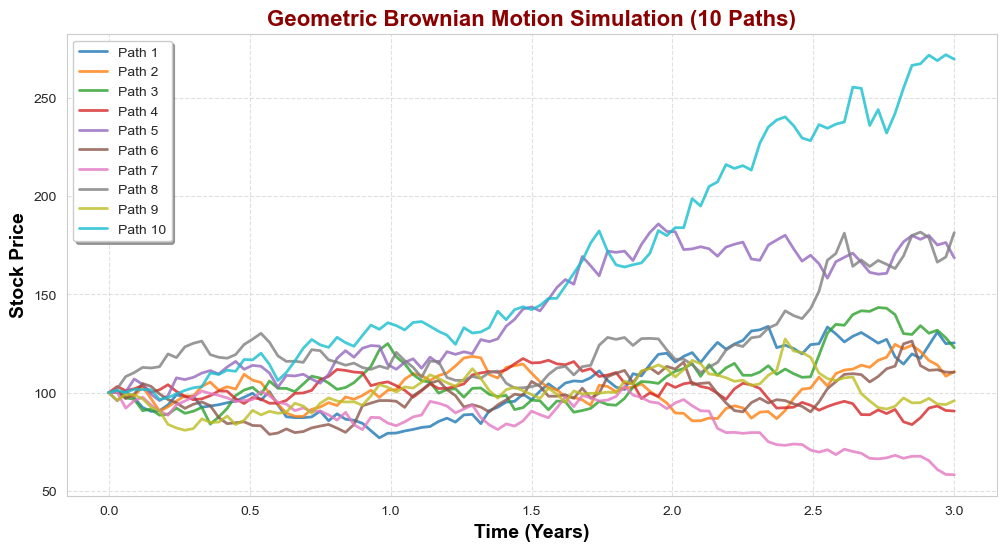

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def geometric_brownian_motion(S0=100, mu=0.05, sigma=0.2, T=3, N=100, paths=10):
    """
    Simulates and plots multiple paths of a Geometric Brownian Motion (GBM).

    Parameters:
    S0 : float  - Initial stock price
    mu : float  - Drift (expected return)
    sigma : float - Volatility
    T : int  - Time horizon (in years)
    N : int  - Number of time steps
    paths : int - Number of simulated paths

    Returns:
    None - Displays a plot of the GBM paths.
    """

    # Define time step and time vector
    dt = T / N  
    t = np.linspace(0, T, N+1)

    # Generate Brownian increments
    dW = np.sqrt(dt) * np.random.randn(paths, N)  
    W = np.cumsum(dW, axis=1)  

    # Add initial zero value for all paths
    W = np.hstack((np.zeros((paths, 1)), W))

    # Compute GBM paths
    S = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W)

    sns.set_style("whitegrid")
    plt.figure(figsize=(12, 6))

    # Plot each path with different styling
    for i in range(paths):
        plt.plot(t, S[i, :], linewidth=2, alpha=0.8, label=f'Path {i+1}')

    # Formatting the plot
    plt.xlabel('Time (Years)', fontsize=14, fontweight='bold', color='black')
    plt.ylabel('Stock Price', fontsize=14, fontweight='bold', color='black')
    plt.title('Geometric Brownian Motion Simulation (10 Paths)', fontsize=16, fontweight='bold', color='darkred')

    # Add a legend, grid, and professional aesthetics
    plt.legend(fontsize=10, loc='upper left', frameon=True, shadow=True, fancybox=True)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

geometric_brownian_motion()


## 5. Lognormal Process Simulation

In this section, we simulate a **lognormal stock price process**, which is commonly used in finance to model the price evolution of assets.

A stock price following a **Geometric Brownian Motion (GBM)** results in a lognormal distribution over time, given by:

$$
S_T = S_0 \exp\left(\left(\mu - \frac{1}{2} \sigma^2\right) T + \sigma \sqrt{T} Z \right)
$$

where:
- \( S_T \) is the **stock price at time \( T \)**,
- \( S_0 \) is the **initial stock price**,
- \( \mu \) is the **expected return** (drift),
- \( \sigma \) is the **volatility**,
- \( Z \sim N(0,1) \) is a **standard normal variable**.

This simulation generates **10,000 possible stock prices** at \( T=3 \) years and visualizes their **distribution** using a **histogram**.


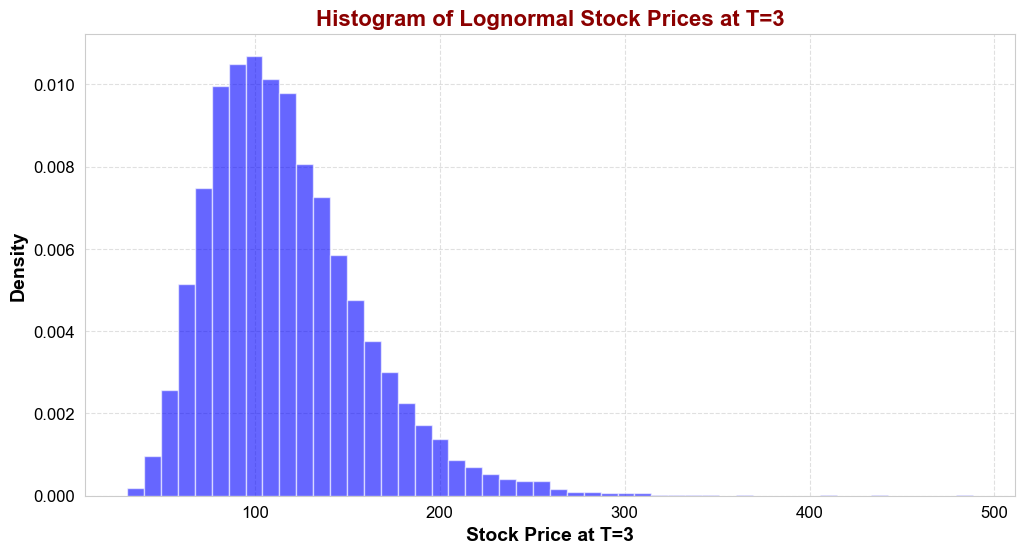

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def lognormal_process(S0=100, mu=0.05, sigma=0.2, T=3, P=10000):
    """
    Simulates a lognormal stock price distribution at time T using the one-step GBM formula.

    Parameters:
    S0 : float  - Initial stock price
    mu : float  - Drift (expected return)
    sigma : float - Volatility
    T : int  - Time horizon (in years)
    P : int  - Number of simulated stock prices

    Returns:
    None - Displays a histogram of the stock price distribution.
    """

    # Generate standard normal random variables
    Z = np.random.randn(P)

    # Compute the lognormal distributed stock prices at T
    S_T = S0 * np.exp((mu - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)

    sns.set_style("whitegrid")
    plt.figure(figsize=(12, 6))

    # Plot histogram
    plt.hist(S_T, bins=50, density=True, alpha=0.6, color='b')

    # Formatting the plot
    plt.xlabel('Stock Price at T=3', fontsize=14, fontweight='bold', color='black')
    plt.ylabel('Density', fontsize=14, fontweight='bold', color='black')
    plt.title('Histogram of Lognormal Stock Prices at T=3', fontsize=16, fontweight='bold', color='darkred')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xticks(fontsize=12, color='black')
    plt.yticks(fontsize=12, color='black')
    plt.show()

lognormal_process()
